# 1. 데이터 불러오기

In [1]:
import pandas as pd 

df = pd.read_csv(
    "./data/서울특별시 공공자전거 이용정보(월별)_25.7-12.csv",
    encoding="CP949"
)
df.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,NaN,20대,68,5353.58,51.93,224057.74,1849
1,202507,102,102. 망원역 1번출구 앞,일일권,NaN,30대,65,6345.95,54.21,233558.04,1773
2,202507,102,102. 망원역 1번출구 앞,일일권,NaN,40대,11,378.59,3.54,15314.12,122
3,202507,102,102. 망원역 1번출구 앞,일일권,NaN,50대,4,169.09,1.46,6287.07,100
4,202507,102,102. 망원역 1번출구 앞,일일권,NaN,60대,1,69.20,0.42,1820.25,9


# 2. 데이터 전처리

## 1) 데이터 정보 확인하기

In [3]:
df.head(1)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,NaN,20대,68,5353.58,51.93,224057.74,1849


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629975 entries, 0 to 629974
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     629975 non-null  int64  
 1   대여소번호    629975 non-null  int64  
 2   대여소명     629975 non-null  object 
 3   대여구분코드   629975 non-null  object 
 4   성별       437187 non-null  object 
 5   연령대코드    629975 non-null  object 
 6   이용건수     629975 non-null  int64  
 7   운동량      629392 non-null  float64
 8   탄소량      629392 non-null  float64
 9   이동거리(M)  629975 non-null  float64
 10  이용시간(분)  629975 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 52.9+ MB


In [104]:
# 데이터는 몇 개이고, 몇 개의 컬럼을 가졌나요?
nrow, ncol = df.shape
print(f"따릉이 데이터는 {nrow:,}개 이고, {ncol}개의 열이 있습니다.")

따릉이 데이터는 629,975개 이고, 11개의 열이 있습니다.


## 2) 데이터 형 변환

In [105]:
# 202507
pd.to_datetime(df["대여일자"], format="%Y%m")

0        2025-07-01
1        2025-07-01
2        2025-07-01
3        2025-07-01
4        2025-07-01
            ...    
629970   2025-12-01
629971   2025-12-01
629972   2025-12-01
629973   2025-12-01
629974   2025-12-01
Name: 대여일자, Length: 629975, dtype: datetime64[ns]

In [106]:
# 대여일자를 int가 아닌 str으로 바꾸기
df["대여일자"] = df["대여일자"].astype(str)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629975 entries, 0 to 629974
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     629975 non-null  object 
 1   대여소번호    629975 non-null  int64  
 2   대여소명     629975 non-null  object 
 3   대여구분코드   629975 non-null  object 
 4   성별       437187 non-null  object 
 5   연령대코드    629975 non-null  object 
 6   이용건수     629975 non-null  int64  
 7   운동량      629392 non-null  float64
 8   탄소량      629392 non-null  float64
 9   이동거리(M)  629975 non-null  float64
 10  이용시간(분)  629975 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 52.9+ MB


In [108]:
df.describe()

,대여소번호,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
count,629975.000000,629975.000000,629392.000000,629392.000000,6.299750e+05,629975.000000
mean,2441.959981,31.188101,1870.839147,16.197041,7.009736e+04,635.473514
std,1649.317268,58.754097,3495.652535,29.552364,1.279532e+05,1134.422807
min,102.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1018.000000,3.000000,195.637500,1.770000,7.638060e+03,71.000000
50%,2119.000000,11.000000,669.825000,6.000000,2.594360e+04,235.000000
75%,3956.000000,33.000000,2054.095000,18.100000,7.830514e+04,708.000000
max,6190.000000,2168.000000,155418.840000,1515.530000,6.598829e+06,54779.000000


In [109]:
# 대여소번호를 str로 바꾸기
df["대여소번호"] = df["대여소번호"].astype(str)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629975 entries, 0 to 629974
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     629975 non-null  object 
 1   대여소번호    629975 non-null  object 
 2   대여소명     629975 non-null  object 
 3   대여구분코드   629975 non-null  object 
 4   성별       437187 non-null  object 
 5   연령대코드    629975 non-null  object 
 6   이용건수     629975 non-null  int64  
 7   운동량      629392 non-null  float64
 8   탄소량      629392 non-null  float64
 9   이동거리(M)  629975 non-null  float64
 10  이용시간(분)  629975 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 52.9+ MB


In [111]:
# (Tip) 많은 변수의 유형 변경을 한 번에 처리하고 싶을 때
# ex. 대여일자, 대여소번호를 str로 바꾸고 싶다. 
# df.astype({"대여일자": str, "대여소번호": str})

## 3) 결측치 파악 및 처리

In [ ]:
# df.isnull().sum()
df.isna().sum()

대여일자            0
대여소번호           0
대여소명            0
대여구분코드          0
성별         192788
연령대코드           0
이용건수            0
운동량           583
탄소량           583
이동거리(M)         0
이용시간(분)         0
dtype: int64

In [113]:
# 결측치가 왜 발생했을까?
## 성별 - 결측치를 대체 ("Other")
## 운동량/탄소량 - 내 분석 목표에 큰 의미를 차지하지 않기 때문에 그냥 둔다. 

### (1) 성별 결측치 처리

In [114]:
# 성별 데이터 몇 개인지 파악하기 
df["성별"].value_counts()

성별
M    233282
F    203831
m        50
f        24
Name: count, dtype: int64

In [115]:
# 다 대문자로 바꾸기
# 결측치를 "O"라고 대체하자. 
df["성별"] = df["성별"].str.upper()
df["성별"] = df["성별"].fillna("O")

In [116]:
df["성별"].value_counts()

성별
M    233332
F    203855
O    192788
Name: count, dtype: int64

## 4) 이상치 파악 및 처리

In [117]:
df.describe()

,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
count,629975.000000,629392.000000,629392.000000,6.299750e+05,629975.000000
mean,31.188101,1870.839147,16.197041,7.009736e+04,635.473514
std,58.754097,3495.652535,29.552364,1.279532e+05,1134.422807
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,3.000000,195.637500,1.770000,7.638060e+03,71.000000
50%,11.000000,669.825000,6.000000,2.594360e+04,235.000000
75%,33.000000,2054.095000,18.100000,7.830514e+04,708.000000
max,2168.000000,155418.840000,1515.530000,6.598829e+06,54779.000000


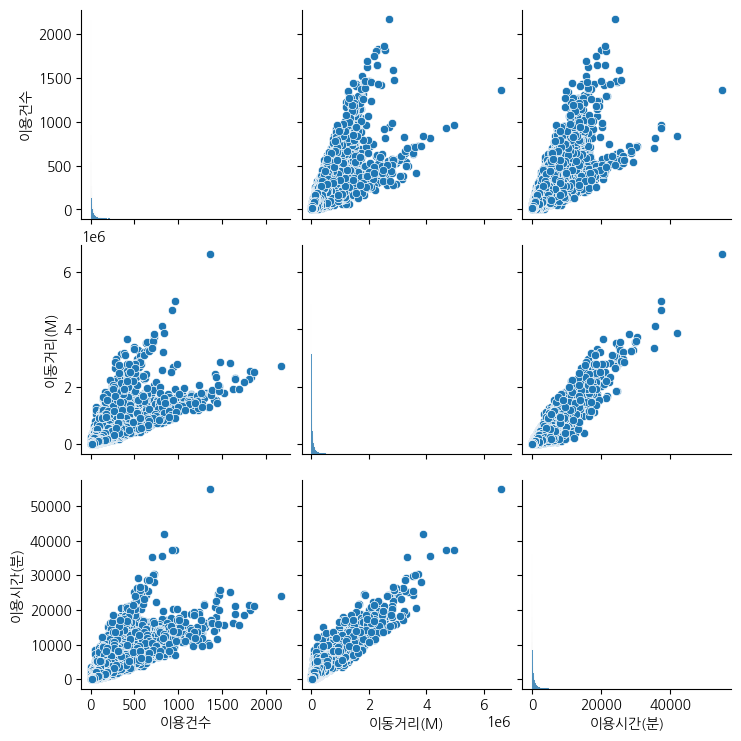

In [118]:
# pair plot 
import koreanize_matplotlib # 한글 적용
import matplotlib.pyplot as plt 
import seaborn as sns

sns.pairplot(
    df[["이용건수", "이동거리(M)", "이용시간(분)"]],
    diag_kind="hist"
)
plt.show()

In [119]:
# 정렬: sort_values(by=[], ascending=)
# 정렬 (이용건수 기준 내림차순 Top10)
df.sort_values(by=["이용건수"], ascending=False).head(3)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
276982,202509,2715,2715.마곡나루역 2번 출구,정기권,M,30대,2168,76889.56,624.19,2715682.23,23859
277453,202509,2728,2728.마곡나루역 3번 출구,정기권,M,30대,1865,71451.56,576.87,2510370.54,21061
64566,202507,2715,2715.마곡나루역 2번 출구,정기권,M,30대,1834,65265.70,529.31,2334817.28,20832


In [120]:
df.sort_values(by=["이용건수"], ascending=False).tail(3)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
4,202507,102,102. 망원역 1번출구 앞,일일권,O,60대,1,69.20,0.42,1820.25,9
629950,202512,6190,6190.마곡광장(마곡나루역 5번출구),일일권,M,60대,1,46.30,0.34,1461.47,13
629949,202512,6190,6190.마곡광장(마곡나루역 5번출구),일일권,M,50대,1,183.41,1.19,5146.14,55


In [121]:
# 정렬 (이동거리(M) 기준 내림차순 Top10)
df.sort_values(by=["이동거리(M)"], ascending=False).head(3)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
315718,202509,5515,5515.한강버스 망원 선착장,일일권,F,20대,1358,155418.84,1515.53,6598829.21,54779
315726,202509,5515,5515.한강버스 망원 선착장,일일권,M,20대,960,135447.46,1141.03,4967456.01,37136
424920,202510,5515,5515.한강버스 망원 선착장,일일권,F,20대,926,111709.99,1082.67,4678027.57,37241


In [122]:
# 정렬 (이용시간(분) 기준 내림차순 Top10)
df.sort_values(by=["이용시간(분)"], ascending=False).head(3)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
315718,202509,5515,5515.한강버스 망원 선착장,일일권,F,20대,1358,155418.84,1515.53,6598829.21,54779
535551,202511,5891,5891.한강버스 여의도 선착장,일일권(비회원),O,기타,833,98914.83,891.63,3882057.34,41836
424920,202510,5515,5515.한강버스 망원 선착장,일일권,F,20대,926,111709.99,1082.67,4678027.57,37241


In [123]:
# 이상치가 정말로 이상한가? 
## 이용건수가 남들보다 많은 사람이 더 큰 값을 가졌다. 
## 건당 이동거리, 건당 이용시간 필요할 것 같다.

## 5) 파생변수 생성

In [124]:
df["건당 이동거리(M)"] = df["이동거리(M)"] / df["이용건수"]
df["건당 이용시간(분)"] = df["이용시간(분)"] / df["이용건수"]

In [125]:
df.head(2)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,O,20대,68,5353.58,51.93,224057.74,1849,3294.966765,27.191176
1,202507,102,102. 망원역 1번출구 앞,일일권,O,30대,65,6345.95,54.21,233558.04,1773,3593.200615,27.276923


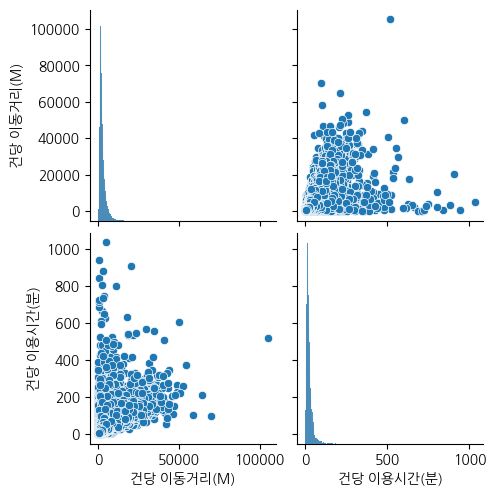

In [126]:
# 건당 이동거리, 건당 이용시간의 히스토그램 그려보기
# pair plot 
import koreanize_matplotlib # 한글 적용
import matplotlib.pyplot as plt 
import seaborn as sns

sns.pairplot(
    df[["건당 이동거리(M)", "건당 이용시간(분)"]],
    diag_kind="hist"
)
plt.show()

In [127]:
# 정렬 (이동거리(M) 기준 내림차순 Top10)
df.sort_values(by=["건당 이동거리(M)"], ascending=False).head(3)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
491594,202511,2541,2541.옛골 입구,일일권(3시간),M,20대,1,3206.89,24.40,105171.58,517,105171.58,517.0
119866,202508,602,602. 장안동 사거리,일일권,M,70대이상,1,2220.45,16.26,70090.00,99,70090.00,99.0
598272,202512,3427,3427.인왕산 아이파크 정문,일일권(비회원),O,기타,1,1663.22,14.99,64616.35,213,64616.35,213.0


In [128]:
# 정렬 (이용시간(분) 기준 내림차순 Top10)
df.sort_values(by=["이용시간(분)"], ascending=False).head(3)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
315718,202509,5515,5515.한강버스 망원 선착장,일일권,F,20대,1358,155418.84,1515.53,6598829.21,54779,4859.226222,40.337997
535551,202511,5891,5891.한강버스 여의도 선착장,일일권(비회원),O,기타,833,98914.83,891.63,3882057.34,41836,4660.332941,50.223289
424920,202510,5515,5515.한강버스 망원 선착장,일일권,F,20대,926,111709.99,1082.67,4678027.57,37241,5051.865626,40.217063


## 전처리 데이터 저장 

In [129]:
df.head(1)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,O,20대,68,5353.58,51.93,224057.74,1849,3294.966765,27.191176


In [130]:
df.to_csv(
    "./data/따릉이_월별정보_전처리_데이터(25_7_12).csv",
    index=False
)

# 3. 데이터 탐색하기

In [131]:
import pandas as pd 

df2 = pd.read_csv("./data/따릉이_월별정보_전처리_데이터(25_7_12).csv")
df2.head(2)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,O,20대,68,5353.58,51.93,224057.74,1849,3294.966765,27.191176
1,202507,102,102. 망원역 1번출구 앞,일일권,O,30대,65,6345.95,54.21,233558.04,1773,3593.200615,27.276923


## 1) 변수별로 특징 파악하기

In [132]:
import koreanize_matplotlib # 한글 적용
import matplotlib.pyplot as plt 
import seaborn as sns

In [133]:
# 대여일자, 몇 월에 가장 많이 따릉이가 이용되었을까?
month_summary = df2["대여일자"].value_counts()
month_summary

대여일자
202510    109286
202509    108768
202511    108310
202508    106089
202507    104205
202512     93317
Name: count, dtype: int64

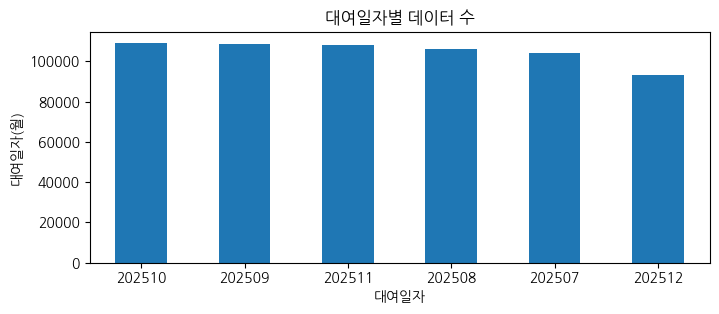

In [134]:
plt.figure(figsize=(8,3))
month_summary.plot(kind="bar")
plt.title("대여일자별 데이터 수")
plt.ylabel("대여일자(월)")
plt.xticks(rotation=0) # x축 라벨 회전
plt.show()


In [135]:
# 9-11월에 가장 많이 이용되었고, 12월엔 이용량이 줄었다.

In [136]:
# 대여소, 사람들이 가장 많이 이용하는 대여소는 어디일까?
location_summary = df2["대여소명"].value_counts().head(5)
location_summary

대여소명
583. 청계천 생태교실 앞            327
502. 자양(뚝섬한강공원)역 1번출구 앞    325
186. 월드컵공원                 322
2622. 올림픽공원역 3번출구          321
4217. 한강공원 망원나들목           320
Name: count, dtype: int64

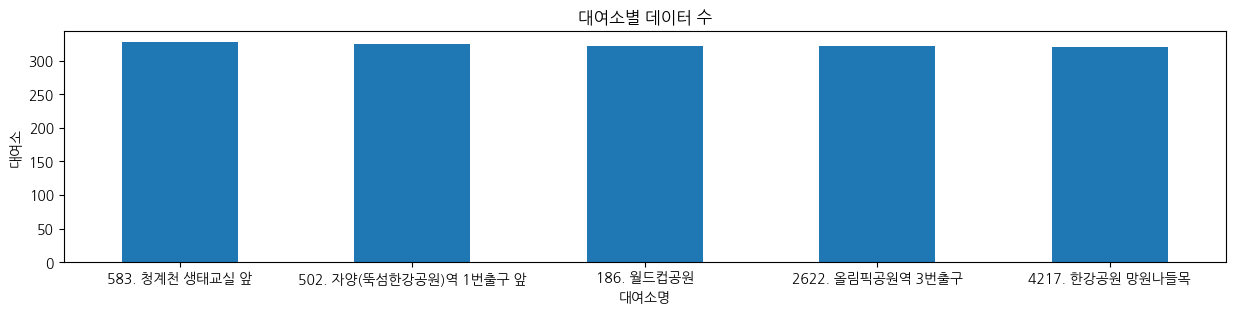

In [137]:
# 대여구분코드, 사람들은 어떤 유형의 대여를 하는가?
plt.figure(figsize=(15,3))
location_summary.plot(kind="bar")
plt.title("대여소별 데이터 수")
plt.ylabel("대여소")
plt.xticks(rotation=0) # x축 라벨 회전
plt.show()


In [138]:
# 한강 근처에서 대여가 많이 일어나는 것 같다. 

In [139]:
# 성별, 성별은 어떻게 이루어져 있는가?

In [140]:
# 연령대, 연령대는 어떻게 이루어져 있는가?

In [141]:
# 건당 이동거리, 건당 이동거리 분포는 어떤가?

In [142]:
# 건당 이용시간, 건당 이용시간 분포는 어떤가?

## 2) 그룹별로 특징 파악하기

In [143]:
df2.head(1)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,O,20대,68,5353.58,51.93,224057.74,1849,3294.966765,27.191176


In [144]:
# 월별로 이동거리에 차이가 있는가?
month_dist_summary = df2.groupby("대여일자")["건당 이동거리(M)"].mean()
month_dist_summary


대여일자
202507    2749.875730
202508    2868.200003
202509    2942.314524
202510    2913.222629
202511    2756.153245
202512    2309.192061
Name: 건당 이동거리(M), dtype: float64

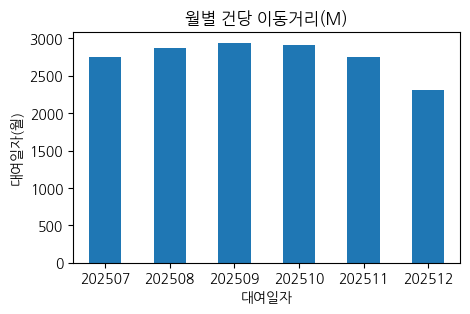

In [145]:
plt.figure(figsize=(5, 3))
month_dist_summary.plot(kind="bar")
plt.title("월별 건당 이동거리(M)")
plt.ylabel("대여일자(월)")
plt.xticks(rotation=0) # x축 라벨 회전
plt.show()


In [146]:
# 대여소별로 이동거리에 차이가 있는가?
location_dist_summary = df2.groupby("대여소명")["건당 이동거리(M)"].mean().sort_values(ascending=False)
location_dist_summary


대여소명
1827. 독산보도육교 앞 자전거 보관소     8558.437961
1858. 500번,507번 버스 종점 앞    8193.087349
5651.한강버스 옥수 선착장           7683.493071
2037. 동작역 5번출구 동작주차공원      7654.498967
4940.한강버스 압구정 선착장          7395.968325
                              ...     
1152. 마곡역교차로               1187.046529
5055. 마곡역5번출구앞             1154.801042
5052. 마곡역 7번출구             1145.880287
2135. 신림역 5번출구              604.980000
1845. 롯데캐슬골드파크1차 서문         575.300000
Name: 건당 이동거리(M), Length: 2795, dtype: float64

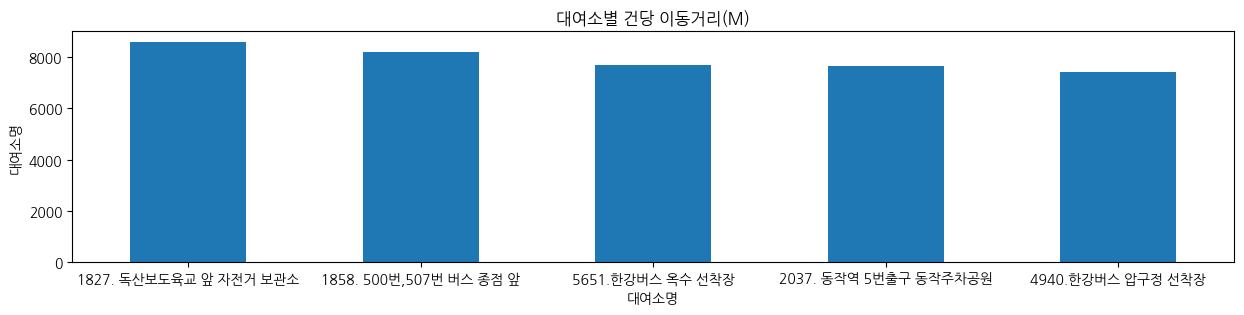

In [147]:
plt.figure(figsize=(15, 3))
location_dist_summary.head(5).plot(kind="bar")
plt.title("대여소별 건당 이동거리(M)")
plt.ylabel("대여소명")
plt.xticks(rotation=0) # x축 라벨 회전
plt.show()


In [148]:
# 한강 또는 천 근처 이용이 많은 듯 하다.

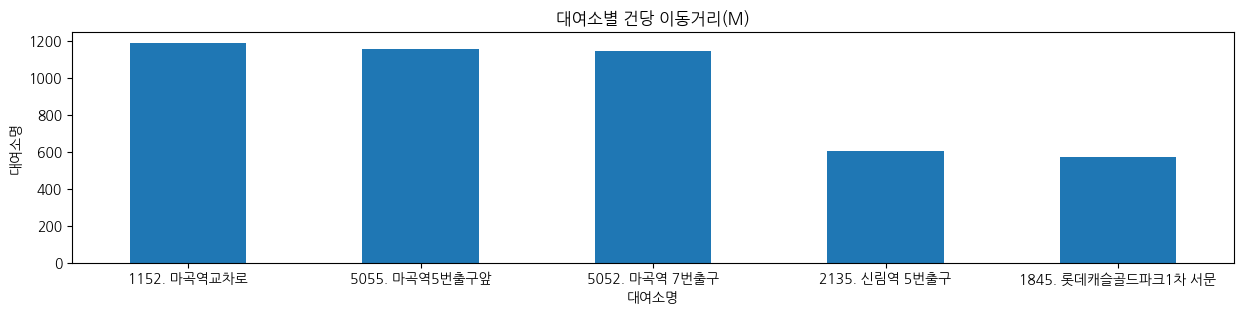

In [149]:
plt.figure(figsize=(15, 3))
location_dist_summary.tail(5).plot(kind="bar")
plt.title("대여소별 건당 이동거리(M)")
plt.ylabel("대여소명")
plt.xticks(rotation=0) # x축 라벨 회전
plt.show()


In [150]:
# 연령대별로 이용거리에 차이가 있는가?
age_dist_summary = df2.groupby("연령대코드")["건당 이동거리(M)"].mean()
age_dist_summary


연령대코드
20대      2520.405916
30대      2614.883954
40대      2883.659139
50대      2928.130345
60대      2692.211374
70대이상    2499.428985
~10대     2967.264896
기타       2888.464039
Name: 건당 이동거리(M), dtype: float64

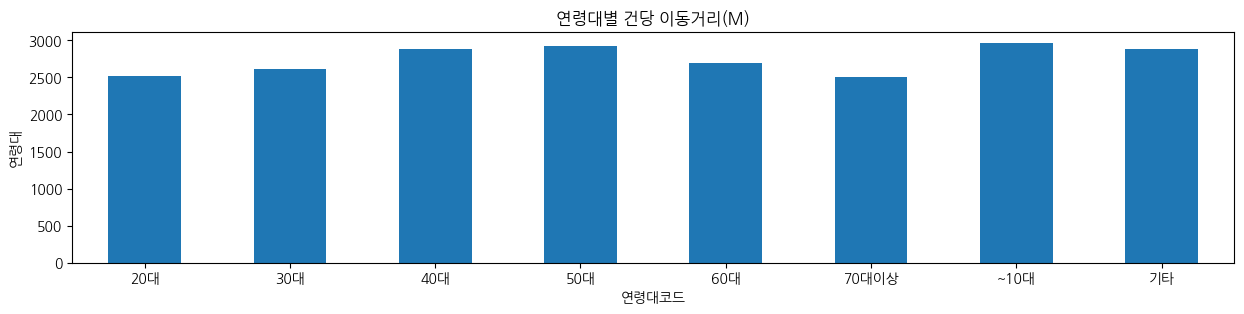

In [151]:
plt.figure(figsize=(15, 3))
age_dist_summary.plot(kind="bar")
plt.title("연령대별 건당 이동거리(M)")
plt.ylabel("연령대")
plt.xticks(rotation=0) # x축 라벨 회전
plt.show()


In [152]:
# 10대와 4,50대가 많이 따릉이를 이용하는 것 같다. 
# 그렇다면 4-50대의 대여소와 ~10대의 대여소는 다를까?

In [153]:
# ... 계속

## 3) 변수 별 관계 파악하기

In [154]:
df2.head(1)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,O,20대,68,5353.58,51.93,224057.74,1849,3294.966765,27.191176


In [155]:
# 성별 X 연령대 분포에 따른 건당 이용시간
pivot_table = df2.pivot_table(
    values="건당 이용시간(분)",
    index="성별",
    columns="연령대코드",
    aggfunc="mean"
)

pivot_table


연령대코드,20대,30대,40대,50대,60대,70대이상,~10대,기타
성별,,,,,,,,
F,22.656268,24.574944,28.134423,27.778702,29.448522,27.155779,27.980463,24.503866
M,21.117935,22.506292,25.325559,25.395875,25.745202,26.948682,25.560062,22.222257
O,21.068815,22.234462,25.013122,25.102036,23.453969,22.748496,31.201627,30.790272


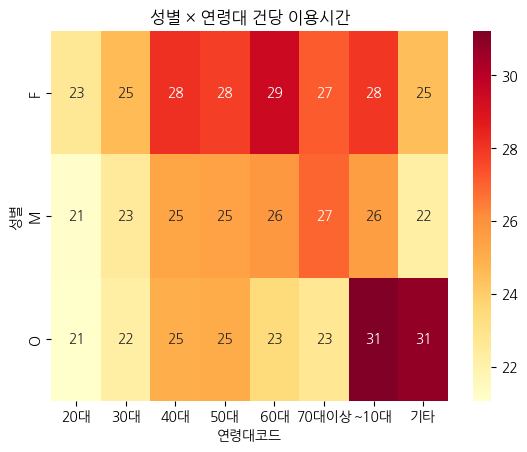

In [156]:
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd"
)
plt.title("성별 × 연령대 건당 이용시간")
plt.show()


In [157]:
# 여성이 더 이용시간이 많은 것 같다.

In [158]:
# 대여일자 X 연령대에 따른 건당 이용시간
pivot_table = df2.pivot_table(
    values="건당 이용시간(분)",
    index="대여일자",
    columns="연령대코드",
    aggfunc="mean"
)

pivot_table

연령대코드,20대,30대,40대,50대,60대,70대이상,~10대,기타
대여일자,,,,,,,,
202507,21.151339,22.143897,25.064165,25.436901,25.364987,25.346086,25.744064,26.035353
202508,21.948600,23.189708,26.408569,26.571122,26.405352,25.648969,27.735078,26.927921
202509,22.488309,24.060738,27.462252,26.911386,27.363389,27.759945,27.397647,27.779046
202510,21.847632,23.743359,27.531723,27.606553,27.882871,26.688678,29.384888,27.579628
202511,22.587831,24.531321,27.583154,26.532879,25.943915,26.043652,27.528855,26.732153
202512,19.516961,20.726067,22.411485,22.901468,23.229050,23.877426,23.448130,23.250335


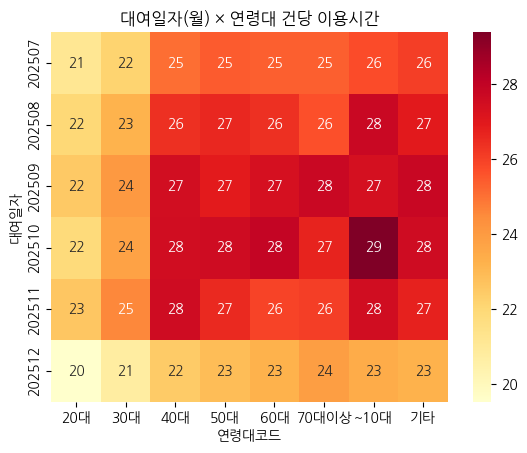

In [159]:
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd"
)
plt.title("대여일자(월) × 연령대 건당 이용시간")
plt.show()


In [160]:
# 대여소명 X 연령대에 따른 건당 이용시간
pivot_table = df2.pivot_table(
    values="건당 이용시간(분)",
    index="대여소명",
    columns="연령대코드",
    aggfunc="mean"
)

pivot_table

연령대코드,20대,30대,40대,50대,60대,70대이상,~10대,기타
대여소명,,,,,,,,
1001. 광진교 남단 사거리(천호공원 방면),25.079897,25.723694,30.423371,26.811757,20.509439,35.396528,18.691927,27.046220
1002. 해공공원(천호동),23.919650,22.929255,27.949342,36.833469,21.462379,35.347752,31.453289,30.435476
1003. 해공도서관앞,18.140473,21.282995,29.819945,27.211827,19.376358,38.545149,26.931285,28.562114
1004. 삼성광나루아파트 버스정류장,27.084993,28.601041,36.440187,30.288014,29.082775,45.609954,38.157988,24.847137
1006. 롯데캐슬 115동앞,20.489812,18.898723,28.566328,22.333152,13.293750,7.000000,13.387680,19.623006
...,...,...,...,...,...,...,...,...
992.북한산입구 정류장,35.816667,32.534542,33.370024,31.502551,25.566306,32.022780,36.398485,33.060559
993.은평뉴타운 은뜨락아파트앞,19.797834,20.038987,25.102618,22.248211,22.578620,8.791667,18.899177,21.972330
994.북한산생태공원입구(교통섬),17.676916,24.557254,17.009253,17.915472,18.373390,17.966667,16.633333,13.541667


In [161]:
location_summary

대여소명
583. 청계천 생태교실 앞            327
502. 자양(뚝섬한강공원)역 1번출구 앞    325
186. 월드컵공원                 322
2622. 올림픽공원역 3번출구          321
4217. 한강공원 망원나들목           320
Name: count, dtype: int64

In [162]:
location_summary.index

Index(['583. 청계천 생태교실 앞', '502. 자양(뚝섬한강공원)역 1번출구 앞', '186. 월드컵공원',
       '2622. 올림픽공원역 3번출구', '4217. 한강공원 망원나들목'],
      dtype='object', name='대여소명')

In [163]:
pivot_table_loc_top5 = pivot_table.loc[location_summary.index, :]
pivot_table_loc_top5

연령대코드,20대,30대,40대,50대,60대,70대이상,~10대,기타
대여소명,,,,,,,,
583. 청계천 생태교실 앞,37.821461,39.427683,41.669640,43.918320,37.117855,47.594991,50.005744,43.698547
502. 자양(뚝섬한강공원)역 1번출구 앞,32.106730,35.019331,35.193315,38.848936,54.207737,31.665638,49.532830,36.689639
186. 월드컵공원,37.697393,44.801561,56.188605,46.621833,39.503361,42.851396,59.667422,43.337888
2622. 올림픽공원역 3번출구,22.463309,26.883532,29.058994,29.634757,28.019992,26.184070,35.816673,31.426294
4217. 한강공원 망원나들목,40.044250,38.952352,41.342859,45.613436,47.130250,47.949430,46.535166,46.429799


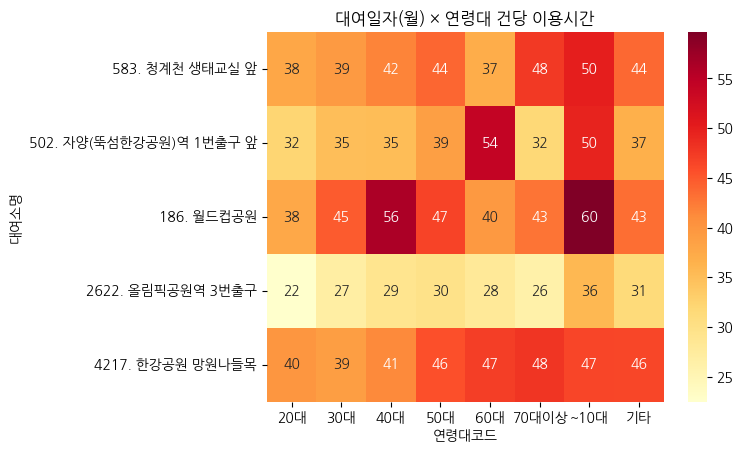

In [164]:
sns.heatmap(
    pivot_table_loc_top5,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd"
)
plt.title("대여일자(월) × 연령대 건당 이용시간")
plt.show()


In [165]:
# ... 계속

# 4. 지도 시각화 실습

## 1) 데이터 준비

In [166]:
df2.head(3)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,O,20대,68,5353.58,51.93,224057.74,1849,3294.966765,27.191176
1,202507,102,102. 망원역 1번출구 앞,일일권,O,30대,65,6345.95,54.21,233558.04,1773,3593.200615,27.276923
2,202507,102,102. 망원역 1번출구 앞,일일권,O,40대,11,378.59,3.54,15314.12,122,1392.192727,11.090909


In [167]:
# 공공자전거 대여소 정보.csv 불러오기
import pandas as pd 

loc_df = pd.read_csv(
    "./data/공공자전거 대여소 정보.csv"
)
loc_df.head(3)

,STA_LOC,RENT_ID,RENT_NO,RENT_NM,RENT_ID_NM,HOLD_NUM,STA_ADD1,STA_ADD2,STA_LAT,STA_LONG,START_INDEX,END_INDEX,RNUM
0,마포구,ST-10,108,서교동 사거리,108. 서교동 사거리,12.0,서울특별시 마포구 양화로 93,427,37.552746,126.918617,0,0,1
1,광진구,ST-100,503,더샵스타시티 C동 앞,503. 더샵스타시티 C동 앞,15.0,서울특별시 광진구 아차산로 262,더샵스타시티 C동 앞,37.536667,127.073593,0,0,2
2,양천구,ST-1000,729,서부식자재마트 건너편,729. 서부식자재마트 건너편,10.0,서울특별시 양천구 신정동 236,서부식자재마트 건너편,37.510380,126.866798,0,0,3


### (1) 통합하는 방법 1

In [168]:
# 어떤 데이터를 지도에 그릴 것인가?
# 대여소별로 건당 이동거리(M) - 2) 그룹별 요약 
loc_dist_summary_top5 = df2.groupby('대여소명')["건당 이동거리(M)"].mean().sort_values(ascending=False).head(5)
loc_dist_summary_top5

대여소명
1827. 독산보도육교 앞 자전거 보관소     8558.437961
1858. 500번,507번 버스 종점 앞    8193.087349
5651.한강버스 옥수 선착장           7683.493071
2037. 동작역 5번출구 동작주차공원      7654.498967
4940.한강버스 압구정 선착장          7395.968325
Name: 건당 이동거리(M), dtype: float64

In [169]:
# 필요한 열만 추출해보자. RENT_ID_NM, STA_LAT, STA_LONG
loc_df[ ["RENT_ID_NM", "STA_LAT", "STA_LONG" ] ]

,RENT_ID_NM,STA_LAT,STA_LONG
0,108. 서교동 사거리,37.552746,126.918617
1,503. 더샵스타시티 C동 앞,37.536667,127.073593
2,729. 서부식자재마트 건너편,37.510380,126.866798
3,731. 서울시 도로환경관리센터,37.529900,126.876541
4,732. 신월중학교,37.539551,126.828300
...,...,...,...
3205,722. 경서농협 버스정류장(우리은행신정동지점방향),37.521511,126.857384
3206,723. SBS방송국,37.529163,126.872749
3207,724. 계남공원 입구 주출입구 좌측,37.510597,126.857323
3208,725. 양강중학교앞 교차로,37.524334,126.850548


In [170]:
# 반복문을 통해서 대여소명, 평균 건당 이동거리(M), 위도, 경도 출력하기 
## 반복 변수: loc
for loc in loc_dist_summary_top5.index:
    print(loc)
    temp = loc_df.loc[  loc_df["RENT_ID_NM"] == loc  ,  ["STA_LAT", "STA_LONG"] ]
    lat = loc_df.loc[  loc_df["RENT_ID_NM"] == loc  ,  "STA_LAT" ].values[0]
    long = loc_df.loc[  loc_df["RENT_ID_NM"] == loc  ,  "STA_LONG" ].values[0]
    print(lat, long)
    print("="*100)

1827. 독산보도육교 앞 자전거 보관소
37.45672607 126.89306641
1858. 500번,507번 버스 종점 앞
37.43727112 126.90268707
5651.한강버스 옥수 선착장
37.53970718 127.01789856
2037. 동작역 5번출구 동작주차공원
37.50318909 126.97714996
4940.한강버스 압구정 선착장
37.52643204 127.01720428


In [171]:
# loc_df에서 RENT_ID_NM이 loc인 STA_LOC, STA_LONG을 출력하고 싶어요.
# loc_df.loc[  조건  ,  ["STA_LAT", "STA_LONG"] ]
# 조건: loc_df["RENT_ID_NM"] == loc
# loc_df.loc[  loc_df["RENT_ID_NM"] == loc  ,  ["STA_LAT", "STA_LONG"] ]

### (2) 통합하는 방법 2

In [172]:
# 대여소별로 건당 이동거리(M) - 2) 그룹별 요약 
loc_dist_summary_top5 = df2.groupby('대여소명')["건당 이동거리(M)"].mean().sort_values(ascending=False).head(5)
loc_dist_summary_top5

대여소명
1827. 독산보도육교 앞 자전거 보관소     8558.437961
1858. 500번,507번 버스 종점 앞    8193.087349
5651.한강버스 옥수 선착장           7683.493071
2037. 동작역 5번출구 동작주차공원      7654.498967
4940.한강버스 압구정 선착장          7395.968325
Name: 건당 이동거리(M), dtype: float64

In [173]:
loc_dist_summary_top5_reset = loc_dist_summary_top5.reset_index()
loc_dist_summary_top5_reset

,대여소명,건당 이동거리(M)
0,1827. 독산보도육교 앞 자전거 보관소,8558.437961
1,"1858. 500번,507번 버스 종점 앞",8193.087349
2,5651.한강버스 옥수 선착장,7683.493071
3,2037. 동작역 5번출구 동작주차공원,7654.498967
4,4940.한강버스 압구정 선착장,7395.968325


In [174]:
loc_df_new = loc_df[ ["RENT_ID_NM", "STA_LAT", "STA_LONG" ] ]
loc_df_new.columns = ["대여소명", "LAT", "LONG"]
loc_df_new

,대여소명,LAT,LONG
0,108. 서교동 사거리,37.552746,126.918617
1,503. 더샵스타시티 C동 앞,37.536667,127.073593
2,729. 서부식자재마트 건너편,37.510380,126.866798
3,731. 서울시 도로환경관리센터,37.529900,126.876541
4,732. 신월중학교,37.539551,126.828300
...,...,...,...
3205,722. 경서농협 버스정류장(우리은행신정동지점방향),37.521511,126.857384
3206,723. SBS방송국,37.529163,126.872749
3207,724. 계남공원 입구 주출입구 좌측,37.510597,126.857323
3208,725. 양강중학교앞 교차로,37.524334,126.850548


In [175]:
merge_data = pd.merge(
    left=loc_dist_summary_top5_reset,          # 데이터1
    right=loc_df_new,                   # 데이터2
    how="left",                         # 취합방법(left, right, inner, outer)
    on="대여소명"                       # 기준
)
merge_data

,대여소명,건당 이동거리(M),LAT,LONG
0,1827. 독산보도육교 앞 자전거 보관소,8558.437961,37.456726,126.893066
1,"1858. 500번,507번 버스 종점 앞",8193.087349,37.437271,126.902687
2,5651.한강버스 옥수 선착장,7683.493071,37.539707,127.017899
3,2037. 동작역 5번출구 동작주차공원,7654.498967,37.503189,126.977150
4,4940.한강버스 압구정 선착장,7395.968325,37.526432,127.017204


## 2) 지도 그려보기

### (1) 지도 출력하기

In [176]:
# uv add folium
import folium

center = [37.565516, 126.978025] # 서울 중심 위치
map = folium.Map(location=center, zoom_start=11)
map


### (2) 지도에 마커 추가하기

In [177]:
folium.Marker(
    location=center, 
    icon=folium.Icon(color="red", icon="heart"),
    popup="서울"
).add_to(map)
map
# 지도에 Marker로 표시하고 싶을 때에는 location, popup 에 넣을 데이터가 필요하다. 

### (3) 지도에 데이터 정보 표현하기

#### 통합하는 방법 1

In [178]:
for loc in loc_dist_summary_top5.index:
    # 값 추출
    print(loc)
    temp = loc_df.loc[  loc_df["RENT_ID_NM"] == loc  ,  ["STA_LAT", "STA_LONG"] ]
    lat = loc_df.loc[  loc_df["RENT_ID_NM"] == loc  ,  "STA_LAT" ].values[0]
    long = loc_df.loc[  loc_df["RENT_ID_NM"] == loc  ,  "STA_LONG" ].values[0]
    print(lat, long)

    # 지도 그리기 
    folium.Marker(
        location=[lat, long], 
        icon=folium.Icon(color="red", icon="heart"),
        popup=loc
    ).add_to(map)

    print("="*100)

1827. 독산보도육교 앞 자전거 보관소
37.45672607 126.89306641
1858. 500번,507번 버스 종점 앞
37.43727112 126.90268707
5651.한강버스 옥수 선착장
37.53970718 127.01789856
2037. 동작역 5번출구 동작주차공원
37.50318909 126.97714996
4940.한강버스 압구정 선착장
37.52643204 127.01720428


In [179]:
map

#### 통합하는 방법 2

In [180]:
# uv add folium
import folium

center = [37.565516, 126.978025] # 서울 중심 위치
map = folium.Map(location=center, zoom_start=11)
map

In [181]:
merge_data

,대여소명,건당 이동거리(M),LAT,LONG
0,1827. 독산보도육교 앞 자전거 보관소,8558.437961,37.456726,126.893066
1,"1858. 500번,507번 버스 종점 앞",8193.087349,37.437271,126.902687
2,5651.한강버스 옥수 선착장,7683.493071,37.539707,127.017899
3,2037. 동작역 5번출구 동작주차공원,7654.498967,37.503189,126.977150
4,4940.한강버스 압구정 선착장,7395.968325,37.526432,127.017204


In [ ]:
# 한 행씩 출력하고 싶어요.
for idx in range(len(merge_data)):
    # merge_data에서 idx 위치에 있는 모든 열의 값을 출력해주세요.
    row_data = merge_data.iloc[idx, :].values
    print(row_data)
    # 각각의 데이터를 변수로 만들어주세요.
    loc = row_data[0]
    lat = row_data[-2]
    long = row_data[-1]
    print(loc, lat, long)
    print("="*30)

    # 지도 그리기
    folium.Marker(
        location=[lat, long], 
        icon=folium.Icon(color="blue", icon="heart"),
        popup=loc
    ).add_to(map)
    

['1827. 독산보도육교 앞 자전거 보관소' np.float64(8558.437960748619)
 np.float64(37.45672607) np.float64(126.89306641)]
1827. 독산보도육교 앞 자전거 보관소 37.45672607 126.89306641
['1858. 500번,507번 버스 종점 앞' np.float64(8193.0873489451)
 np.float64(37.43727112) np.float64(126.90268707)]
1858. 500번,507번 버스 종점 앞 37.43727112 126.90268707
['5651.한강버스 옥수 선착장' np.float64(7683.493070511286) np.float64(37.53970718)
 np.float64(127.01789856)]
5651.한강버스 옥수 선착장 37.53970718 127.01789856
['2037. 동작역 5번출구 동작주차공원' np.float64(7654.498967120714)
 np.float64(37.50318909) np.float64(126.97714996)]
2037. 동작역 5번출구 동작주차공원 37.50318909 126.97714996
['4940.한강버스 압구정 선착장' np.float64(7395.968325458602) np.float64(37.52643204)
 np.float64(127.01720428)]
4940.한강버스 압구정 선착장 37.52643204 127.01720428


In [183]:
map